Bond Pricing Tool
Zero-coupon bond price: 0.8475
Bond Duration: 5405.5433
Bond Convexity: 26145.1862


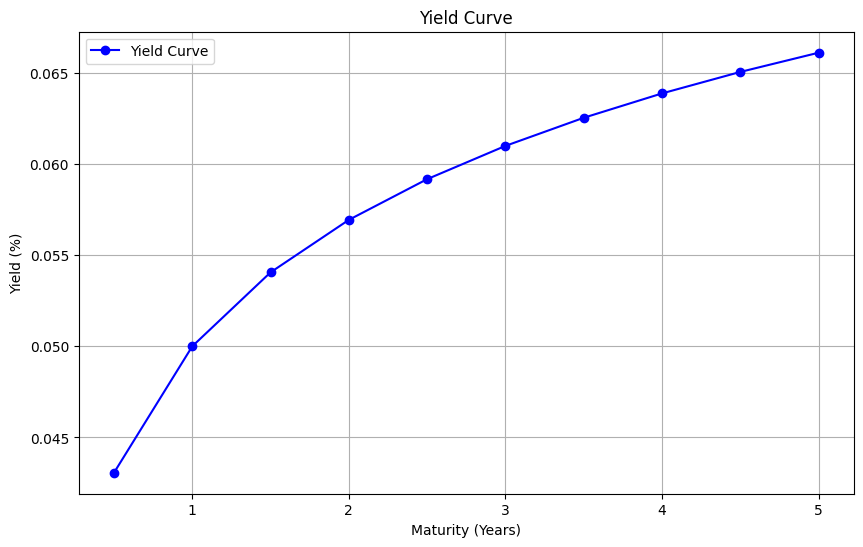

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def vasicek_bond_price(r0, a, b, sigma, T):
    B = (1 - np.exp(-a * T)) / a
    A = np.exp((b - (sigma ** 2) / (2 * a ** 2)) * (B - T) - (sigma ** 2) * (B ** 2) / (4 * a))
    return A * np.exp(-B * r0)

def bond_duration_convexity(price, coupon_rate, face_value, T, frequency):
    t = np.arange(1, T * frequency + 1) / frequency
    coupon = face_value * coupon_rate / frequency
    cash_flows = np.full_like(t, coupon)
    cash_flows[-1] += face_value
    discounted_cash_flows = cash_flows / ((1 + coupon_rate / frequency) ** (t * frequency))
    duration = np.sum(t * discounted_cash_flows) / price
    convexity = np.sum(t ** 2 * discounted_cash_flows) / price
    return duration, convexity

def plot_yield_curve(terms, yields):
    plt.figure(figsize=(10, 6))
    plt.plot(terms, yields, marker='o', linestyle='-', color='b', label='Yield Curve')
    plt.title('Yield Curve')
    plt.xlabel('Maturity (Years)')
    plt.ylabel('Yield (%)')
    plt.grid(True)
    plt.legend()
    plt.show()

def main():
    print("Bond Pricing Tool")
    r0 = 0.03
    a = 0.1
    b = 0.05
    sigma = 0.02
    T = 5
    face_value = 1000
    coupon_rate = 0.04

    price = vasicek_bond_price(r0, a, b, sigma, T)
    print(f"Zero-coupon bond price: {price:.4f}")

    duration, convexity = bond_duration_convexity(price, coupon_rate, face_value, T, 2)
    print(f"Bond Duration: {duration:.4f}")
    print(f"Bond Convexity: {convexity:.4f}")

    terms = np.linspace(0.5, T, 10)
    yields = [b + 0.01 * np.log(term) for term in terms]
    plot_yield_curve(terms, yields)

if __name__ == "__main__":
    main()